## Previsão de Vendas - Celulares


In [12]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


Existem 3980 diferentes produtos na base de dados, que compreendem os números de vendas de vários produtos de categorias distintas, porém, como para este caso queremos apenas dos celulares (smartphones), então é feita uma filtragem.

In [20]:
df = df[[x for x in df.columns if "SMARTPHONE" in x]]
              
df.head()

,SMARTPHONE ALCATEL OT 4033 CLARO PRETO,SMARTPHONE ALCATEL PIXI3 4009 DB PRETO,SMARTPHONE ALCATEL PIXI3 4009E CLARO PRETO,SMARTPHONE ALCATEL PIXI4 4034E DB METALLIC,SMARTPHONE ALCATEL PIXI4 4034E DB PRETO,SMARTPHONE ALCATEL PIXI4 4034E LITE DB,SMARTPHONE ALCATEL PIXI4 5010E LITE DB PT,SMARTPHONE ALCATEL POP3 5016 DB PRETO,SMARTPHONE APPLE IPHONE 4S 8GB CLARO PRETO,SMARTPHONE APPLE IPHONE 6S 16GB DB GOLD,...,SMARTPHONE SONY XPERIA E4 DB PRETO,SMARTPHONE SONY XPERIA M C2004 DB BRANCO,SMARTPHONE SONY XPERIA M C2004 DB PRETO,SMARTPHONE SONY XPERIA M2 AQUA DB BRANCO,SMARTPHONE SONY XPERIA M2 AQUA DB PRETO,SMARTPHONE SONY XPERIA M2 DB PRETO,SMARTPHONE ZTE C341 KIS DUAL DB BRANCO,SMARTPHONE ZTE C341 KIS DUAL DB PRETO,SMARTPHONE ZTE L110 BLADE DUAL DB PRETO,SMARTPHONE ZTE L5 SHADE DB CINZA
2015-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Vejamos quais são os 10 smartphones mais vendidos no período:

In [22]:
su = df.sum()
su = su.sort_values(kind='quicksort', ascending=False)
su[:10]

SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO        805.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR    644.0
SMARTPHONE SAMSUNG GAL J5 J500 DB DOURADO        642.0
SMARTPHONE MOTOROLA MOTO G 16G 1069 2oDTV DB     551.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS    504.0
SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO        470.0
SMARTPHONE SAMSUNG GAL J1 MINI DB PRETO          427.0
SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT    422.0
SMARTPHONE SAMSUNG GAL J5 PRIME DB DOURADO       385.0
SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO          323.0
dtype: float64

São 9 da Samsung, pertencentes a família 'J' e 1 da Motorola, basicamente, usaremos em diante os smartphones da Samsung da família J.

In [25]:
df = df[[x for x in df.columns if "SMARTPHONE SAMSUNG GAL J" in x]]

df.head()

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO,SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO,SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT
2015-01-02,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Restaram assim 89 produtos diferentes, nota-se uma presença de vários NaN, que serão substituídos por 0.

In [26]:
df.fillna(value=0, inplace=True)

É feito um ajuste na granularidade, os dados vão desde de 2015-01-01 (quinta) até 2019-05-30 (quarta), ajustar a granularidade para ser feita a medição de vendas com base na soma de vendas de um item por semana, esta iniciando na quinta.

In [27]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO,SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO,SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO,SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 4G DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO,SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO,SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO,SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO,...,SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO,SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO,SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO,SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO,SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR,SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR,SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Uma análise do comportamento de diferentes celulares vendidos no período, iniciando pela correlação.

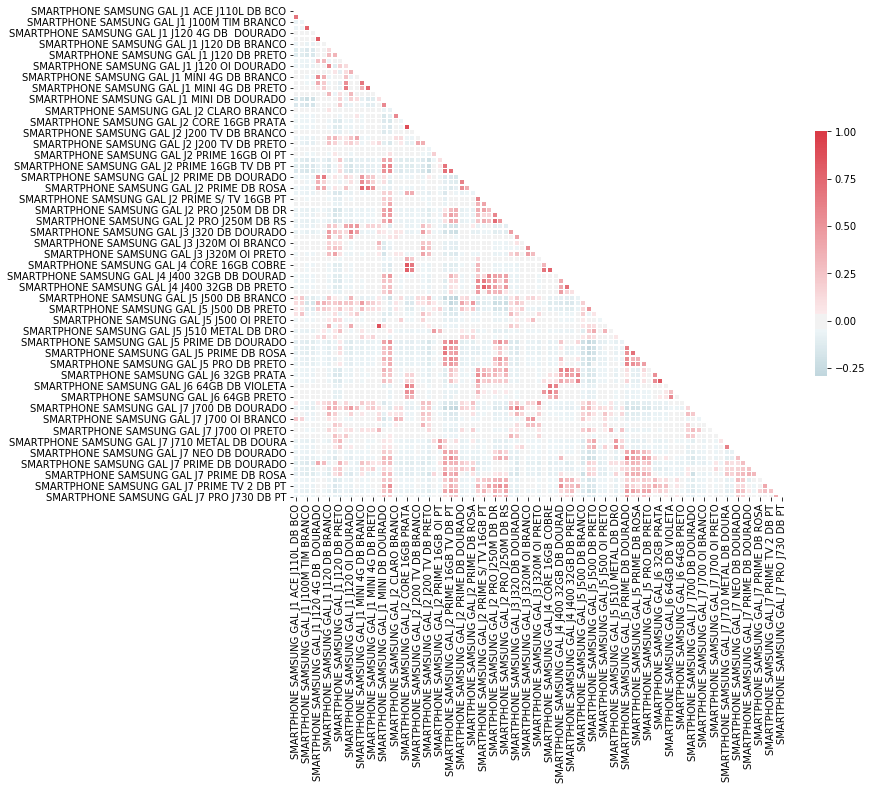

In [28]:
corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

Percebe-se que existem alguns pares com um vermelho mais intenso, o que indica uma forte correlação.

Percebe-se uma correlação forte (p >=0.7) em 14 pares distintos de aparelhos, sendo alguns pares de mesmo modelo só que com cores distintas.

Pares com correlação forte (p >= 0.7): 14


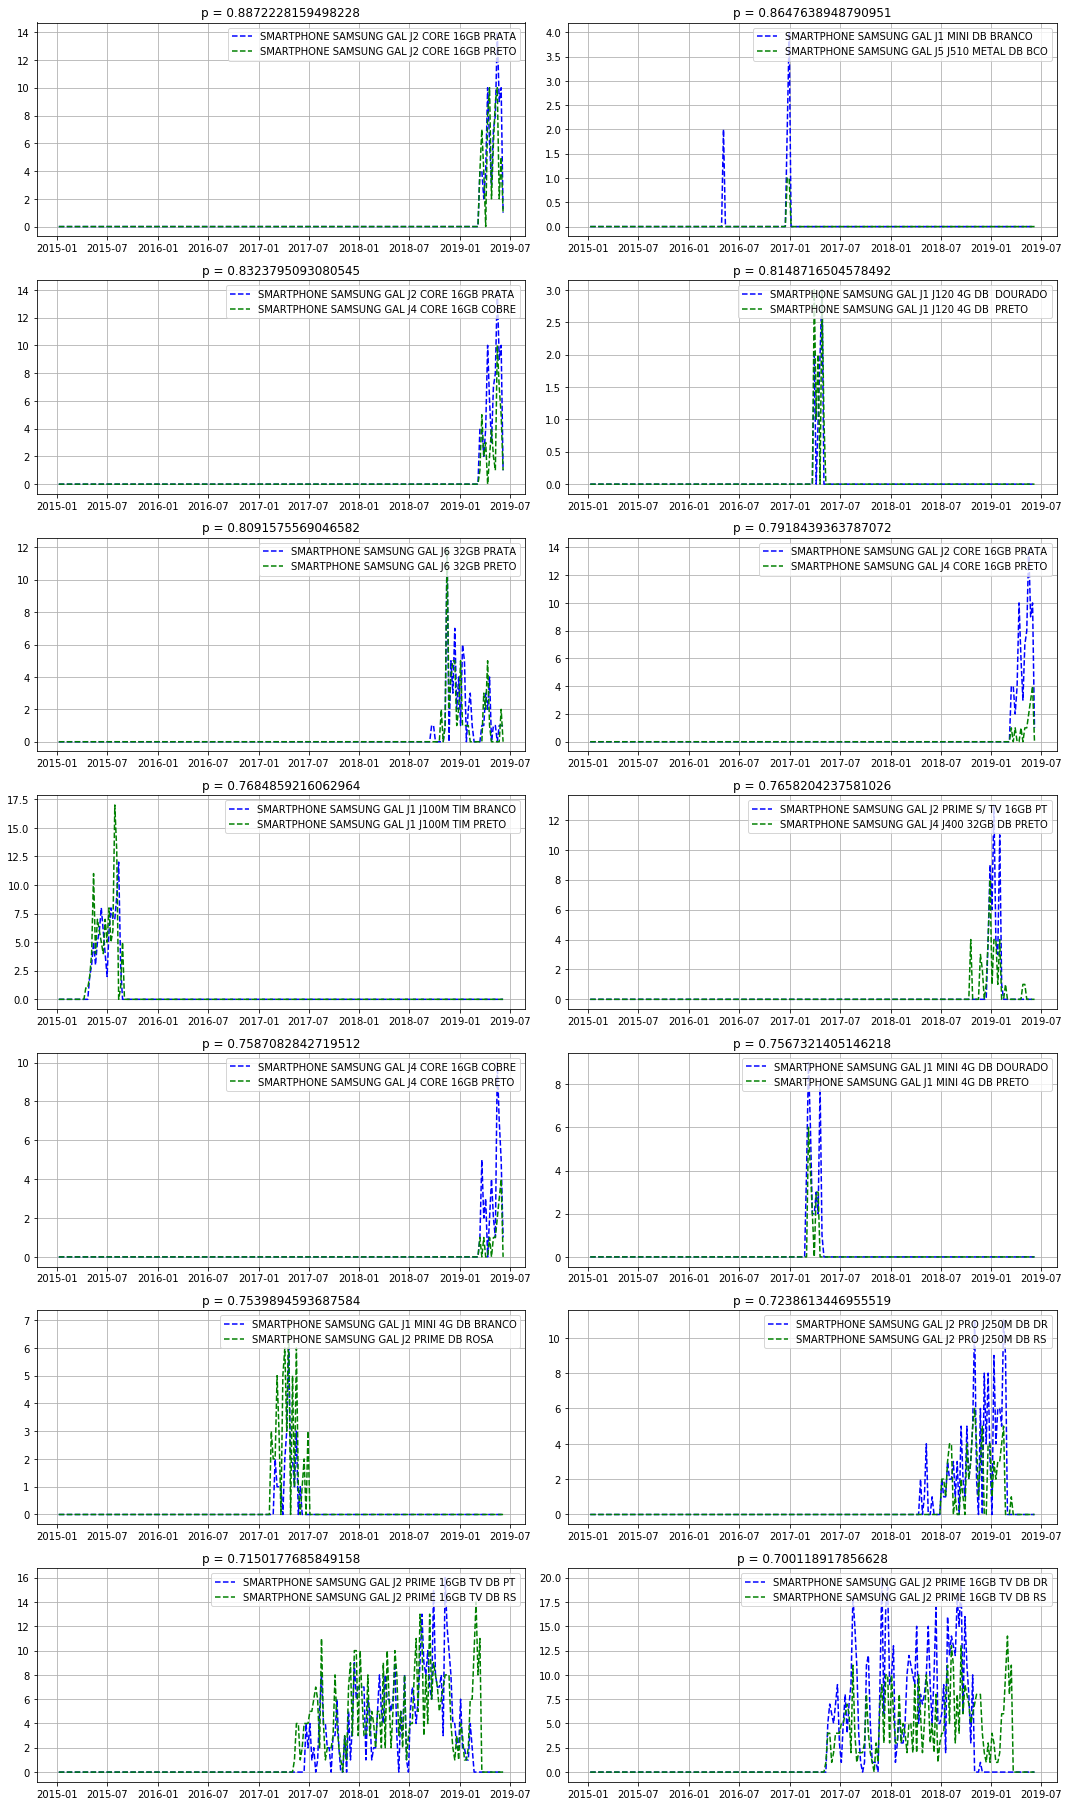

In [55]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

plt.figure(figsize=(15,50))

num_s = len([x for x in so.tolist() if x >= 0.7])
print("Pares com correlação forte (p >= 0.7): %d" % num_s)

for i in range(num_s):
    plt.subplot(num_s, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

Existem 14 pares com correlação forte (p >= 0.7). A análise dos gráficos mostra que alguns dos pares possuem correlação forte por serem modelos iguais de cores distintas. Adicionalmente, em outros casos, pelo baixo número de vendas para tal par, a correlação observada acaba por ser alta, pelo fato das vendas serem concentradas em poucas semanas, sendo nula para o resto, ainda há o caso particular do J2 Core e J4 Core, que foram lançados praticamente no mesmo período [[Fonte J4 Core]](https://www.tudocelular.com/Samsung/fichas-tecnicas/n5032/Samsung-Galaxy-J4-Core.html) [[Fonte J2 Core]](https://www.tudocelular.com/Samsung/fichas-tecnicas/n4795/Samsung-Galaxy-J2-Core.html). Adicionalmente, vejamos a correlação para pares com correlação não-insignificante negativa (p <= -0.2):

Pares com correlação negativa (p <= 0.2): 27 


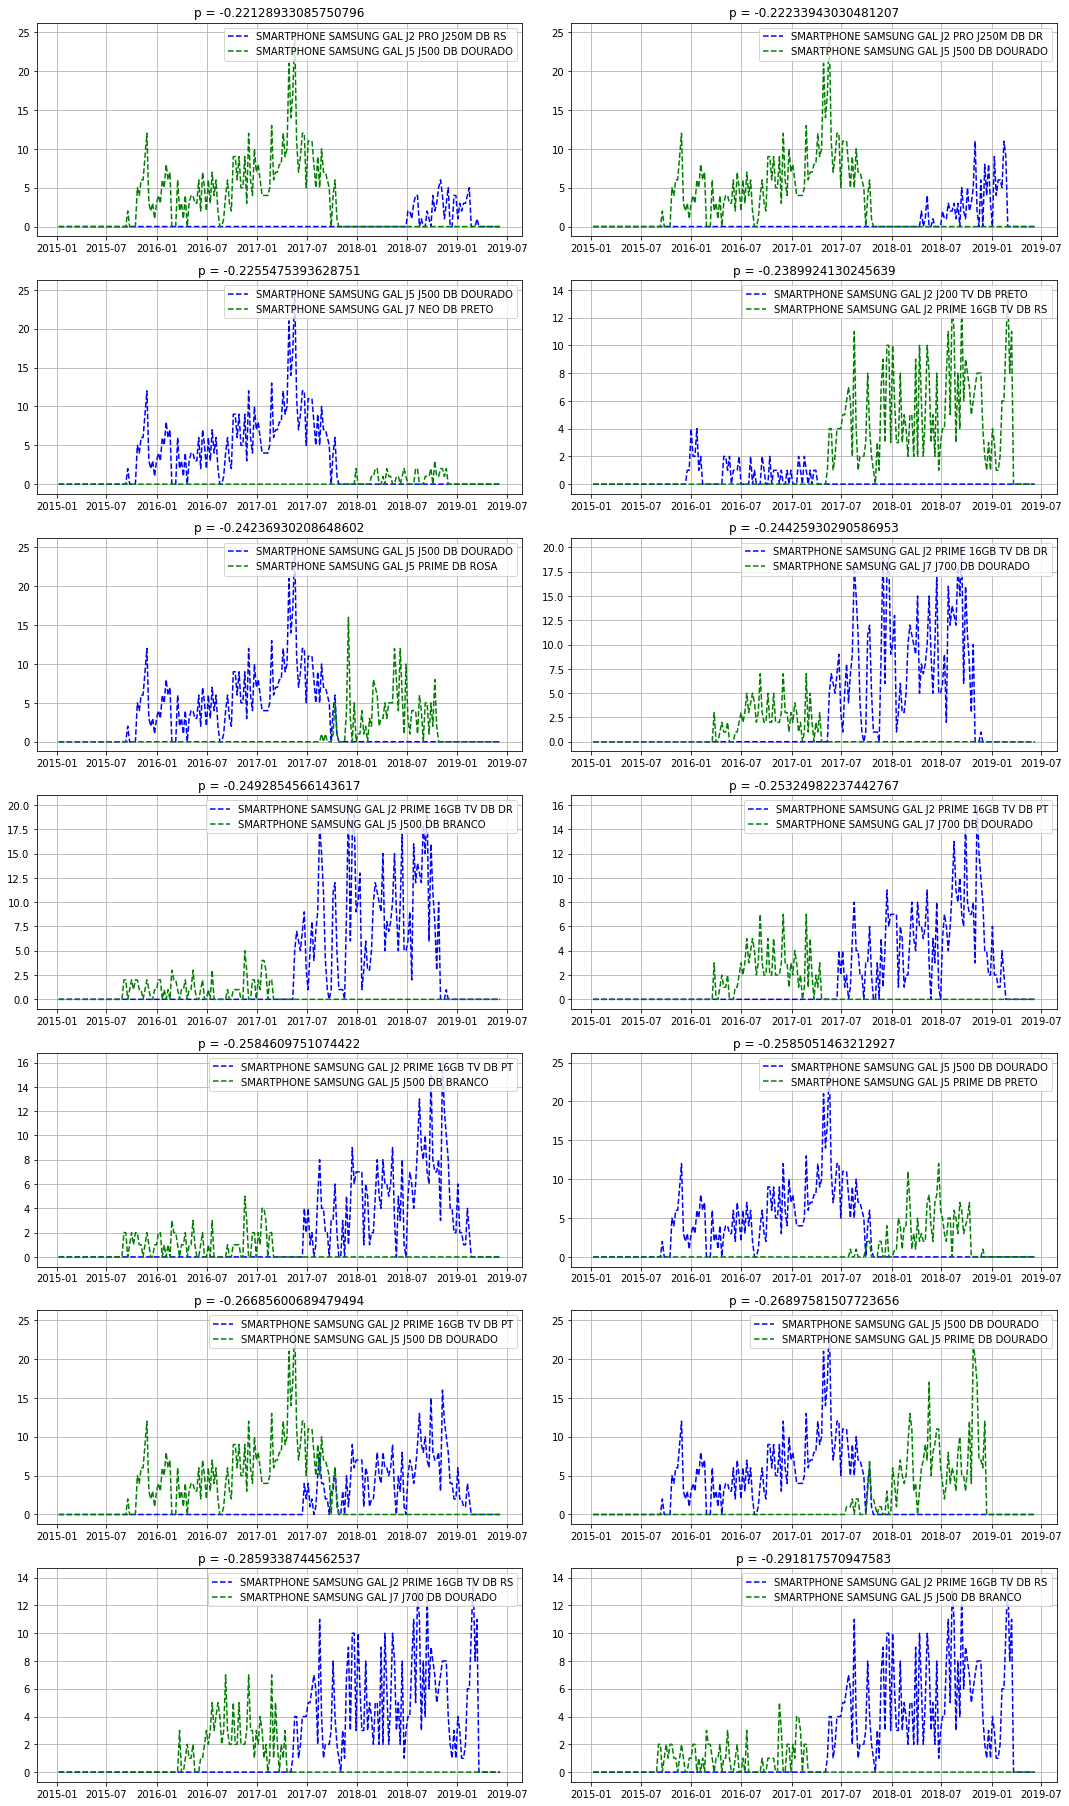

In [54]:
num_n = len([x for x in so.tolist() if x <= -0.2])

print("Pares com correlação negativa (p <= 0.2): %d " % num_n)
plt.figure(figsize=(15,50))

for i in range(len(so)-num_s, len(so)):
    plt.subplot(num_s, 2, i+1-len(so)+num_s)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
    
plt.tight_layout()
plt.show()

Percebe-se que enquanto um sobe nas vendas o outro cai, o que pode sugerir que está ocorrendo uma mudança de geração. Para condensar as informações, juntaremos modelos iguais de cores distintas que possuem uma forte correlação (p >= 0.7):

In [60]:
j2_core = ['SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA', 'SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRETO']
j4_core = ['SMARTPHONE SAMSUNG GAL J4 CORE 16GB COBRE', 'SMARTPHONE SAMSUNG GAL J4 CORE 16GB PRETO']
j1_120 = ['SMARTPHONE SAMSUNG GAL J1 J120 4G DB  DOURADO', 'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  PRETO']
j6_32 = ['SMARTPHONE SAMSUNG GAL J6 32GB PRATA', 'SMARTPHONE SAMSUNG GAL J6 32GB PRETO']
j1_100m = ['SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO', 'SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO']
j2_prime = ['SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT', 'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS', 'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR']
j2_pro = ['SMARTPHONE SAMSUNG GAL J2 PRO J250M DB DR', 'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB RS']

## Criando o modelo

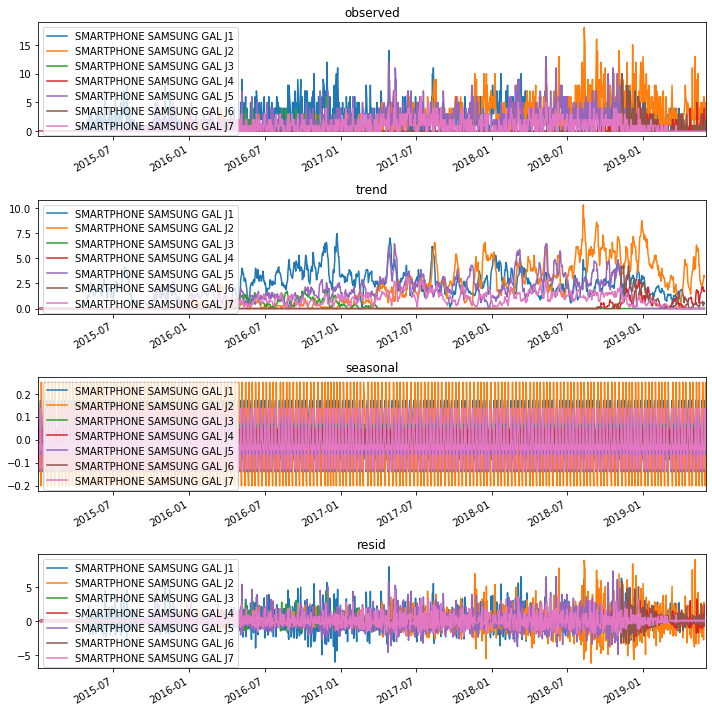

In [244]:
result = seasonal_decompose(dfw[n], model = 'additive', freq = 7)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))

#Plota
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")

plt.tight_layout()

In [245]:
year_dict = {'SMARTPHONE SAMSUNG GAL J1 ACE J110L DB BCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 ACE J110L DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J100M TIM BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J1 J100M TIM PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 4G DB  PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 OI BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 OI DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 J120 OI PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI 4G DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J1 MINI DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J2 CLARO BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J2 CLARO PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J2 CORE 16GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J2 J200 TV DB BRANCO':'2017',
'SMARTPHONE SAMSUNG GAL J2 J200 TV DB DOURADO':'2017',
'SMARTPHONE SAMSUNG GAL J2 J200 TV DB PRETO':'2017',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB OI DOURA':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB OI PT':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB DR':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB PT':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME 16GB TV DB RS':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME DB ROSA':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB DR':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB PT':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRIME S/ TV 16GB RS':'2016',
'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB DR':'2018',
'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB PT':'2018',
'SMARTPHONE SAMSUNG GAL J2 PRO J250M DB RS':'2018',
'SMARTPHONE SAMSUNG GAL J3 J320 DB BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320 DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320 DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320M OI BRANCO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320M OI DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J3 J320M OI PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J4 CORE 16GB AZUL':'2018',
'SMARTPHONE SAMSUNG GAL J4 CORE 16GB COBRE':'2018',
'SMARTPHONE SAMSUNG GAL J4 CORE 16GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB DOURAD':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J4 J400 32GB DB VIOLET':'2018',
'SMARTPHONE SAMSUNG GAL J5 J500 DB BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 DB DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 DB PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 OI DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J500 OI PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J5 J510 METAL DB BCO':'2016',
'SMARTPHONE SAMSUNG GAL J5 J510 METAL DB DRO':'2016',
'SMARTPHONE SAMSUNG GAL J5 J510 METAL DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRIME DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRIME DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRIME DB ROSA':'2016',
'SMARTPHONE SAMSUNG GAL J5 PRO DB DOURADO':'2017',
'SMARTPHONE SAMSUNG GAL J5 PRO DB PRETO':'2017',
'SMARTPHONE SAMSUNG GAL J6 32GB DB VIOLETA':'2018',
'SMARTPHONE SAMSUNG GAL J6 32GB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J6 32GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J6 64GB DB VIOLETA':'2018',
'SMARTPHONE SAMSUNG GAL J6 64GB PRATA':'2018',
'SMARTPHONE SAMSUNG GAL J6 64GB PRETO':'2018',
'SMARTPHONE SAMSUNG GAL J7 J700 DB BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 DB DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 DB PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 OI BRANCO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 OI DOURADO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J700 OI PRETO':'2015',
'SMARTPHONE SAMSUNG GAL J7 J710 METAL DB BRANC':'2016',
'SMARTPHONE SAMSUNG GAL J7 J710 METAL DB DOURA':'2016',
'SMARTPHONE SAMSUNG GAL J7 J710 METAL DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J7 NEO DB DOURADO':'2017',
'SMARTPHONE SAMSUNG GAL J7 NEO DB PRETO':'2017',
'SMARTPHONE SAMSUNG GAL J7 PRIME DB DOURADO':'2016',
'SMARTPHONE SAMSUNG GAL J7 PRIME DB PRETO':'2016',
'SMARTPHONE SAMSUNG GAL J7 PRIME DB ROSA':'2016',
'SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB DR':'2018',
'SMARTPHONE SAMSUNG GAL J7 PRIME TV 2 DB PT':'2018',
'SMARTPHONE SAMSUNG GAL J7 PRO J730 DB DR':'2017',
'SMARTPHONE SAMSUNG GAL J7 PRO J730 DB PT':'2017'}

In [247]:
n = []
for i in range(5, 9):
    fam = [x for x in df.columns if year_dict.get(x) in ('201' + str(i))]
    n.append(("Modelo 201" + str(i)))
    dfw[("Modelo 201" + str(i))] = dfw[fam].sum(axis=1)

TypeError: 'in <string>' requires string as left operand, not NoneType

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dfw[n])
plt.legend(n, loc='upper left')

In [ ]:
result = seasonal_decompose(dfw[n], model = 'additive', freq = 4)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(10,10))

#Plota
result.observed.plot(ax = ax1, title = "observed")
result.trend.plot(ax = ax2, title = "trend")
result.seasonal.plot(ax = ax3, title = "seasonal")
result.resid.plot(ax = ax4, title = "resid")

plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(x['Modelo 2016'].values, order=(7,1,0))
fitted = model.fit()
print(fitted.summary())

In [ ]:
residuals = pd.DataFrame(fitted.resid)
residuals.plot()
plt.show()

In [ ]:
x = dfw['Modelo 2015'][:int((len(dfw)*4)/10)]
y = dfw['Modelo 2015'][int((len(dfw)*4)/10):]
history = [xx for xx in x]
predictions = list()
# walk-forward validation
for t in range(len(y)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y[t]
    history.append(obs)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
# evaluate forecasts
rmse = sqrt(mean_squared_error(y, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test R^2: %.3f' % r2_score(y, predictions))
# plot forecasts against actual outcomes
plt.plot(y.tolist())
plt.plot(predictions, color='red')
plt.show()

In [ ]:
dfw["Galaxy J"] = dfw[['Modelo 2015', 'Modelo 2016', 'Modelo 2017', 'Modelo 2018']].sum(axis=1)
plt.plot(dfw['Galaxy J'])

In [ ]:
x = dfw['Galaxy J'][:int((len(dfw)*7)/10)]
y = dfw['Galaxy J'][int((len(dfw)*7)/10):]
history = [xx for xx in x]
predictions = list()
# walk-forward validation
for t in range(len(y)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = y[t]
    history.append(obs)

# evaluate forecasts
rmse = sqrt(mean_squared_error(y, predictions))
print('Test RMSE: %.3f' % rmse)
print('Test R^2: %.3f' % r2_score(y, predictions))
# plot forecasts against actual outcomes
plt.plot(y.tolist())
plt.plot(predictions, color='red')
plt.show()

In [18]:
x = [x for x in df.columns if "SMARTPHONE SAMSUNG GAL J" in x]

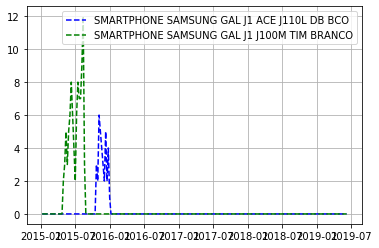

In [19]:
plt.grid(True)
plt.plot(dfw[x[0]], "b--", dfw[x[2]], "g--", label=so.index[i][0])
plt.legend([x[0],x[2]], loc ='upper right')
